### MNIST
## torchvision
- torchvision consists of popular datasets, model architectures, common image transformations(preprocessing) for computer vision

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

## MNIST 함수
- root: 여기에 있는 data를 불러오겠다.
- train: true 하면 train data를, false 하면 test data를 가지고 온다.
- transform: 데이터(여기서는 이미지)의 값을 파이토치에 맞게 바꾸어 줌
- download: root에 mnist data가 없을 때 true면 다운을 받겠다.

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

## DataLoader
- dataset: 어떤 데이터를 불러올 것인지(mnist_train)
- batch_size: 몇 개씩 잘라서 불러올 것인지
- shuffle: 무작위로 or 있는 그대로
- drop_last: batch_size 만큼씩 불러올 때, 마지막에 맞지 않아서 남는 데이터를 어떻게 할 것인지(true면 사용하지 않겠다.)

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    
    for X,Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X=X.view(-1,28*28).to(device)
        Y=Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost+=cost/total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.534912467
Epoch: 0002 cost = 0.359308630
Epoch: 0003 cost = 0.331088215
Epoch: 0004 cost = 0.316574186
Epoch: 0005 cost = 0.307130307
Epoch: 0006 cost = 0.300207853
Epoch: 0007 cost = 0.294897288
Epoch: 0008 cost = 0.290830463
Epoch: 0009 cost = 0.287419587
Epoch: 0010 cost = 0.284589082
Epoch: 0011 cost = 0.281816185
Epoch: 0012 cost = 0.279919684
Epoch: 0013 cost = 0.277836829
Epoch: 0014 cost = 0.276022315
Epoch: 0015 cost = 0.274443179


Accuracy: 0.8867999911308289
Label:  8
Prediction:  3


C:\Users\dmsgh\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\dmsgh\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


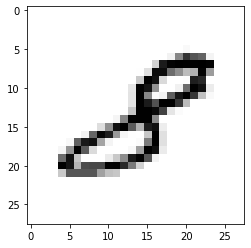

In [9]:
# Test the model using test sets
with torch.no_grad(): #gradient 없이 연산하겠다고 선언 ==> 실수 방지해줌
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()